<a href="https://colab.research.google.com/github/leeCodingStudio/Python_machine_learning/blob/master/18_CNN_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. CNN(Convolutional Neural Networks)
* 합성곱 인공 신경망
* 전통적인 뉴럴 네트워크에 컴볼루셔널 레이어를 붙인 형태
* 컨볼루셔널 레이어를 통해 입력 받은 이미지에 대한 특징(Feature)을 추출하게 되고, 추출한 특징을 기반으로 기존의 뉴럴 네트워크에 이용하여 분류

### 1-1. CNN을 사용하는 이유
* 이미지 분류할 때 DNN(Deep Neural Network)의 문제점
    * 일반적인 DNN은 1차원 형태의 데이터를 사용 -> 2차원 이상의 데이터가 입력되는 경우는 flatten 시켜서 한줄로 데이터를 변환 후 넣음
    * 이미지의 공간적/지역적 정보가 손실됨

> DNN의 문제점을 해결하기 위해 이미지를 그대로(Raw Input) 받음으로 공간적/지역적 정보를 유지

![](https://i.imgur.com/yn9B3Et.jpg)

### 1-2. 이미지 데이터
* 컬러 이미지는 3개의 채널로 이루어진 텐서
* 컴퓨터는 이미지를 숫자로 인식하여 연산을 함

<img src="https://i.imgur.com/mD4nKK1.png" width="300px">

<img src="https://i.imgur.com/bljeUqc.png" width="300px">

* 이미지의 정보는 0 ~ 255까지 256개의 숫자로 표현
* 빨강 255, 파랑 255, 초록 255은 흰색
* 빨강 0, 파랑 0, 초록 0은 검정
* 빨강 255, 파랑 0, 초록 0은 빨강


# 2. Convolution 연산

![](https://i.imgur.com/2MiTVss.png)

* 컨볼루션 연산을 진행하면 출력 텐서의 크기가 작아짐

![](https://i.imgur.com/fUuvC2r.gif)

* 패딩
    * 입력값 주위로 0을 넣어서 입력 값의 크기를 인위적으로 키워 결과값이 작아지는 것을 방지

![](https://i.imgur.com/AzbJCgg.gif)

* 컬러 이미지에는 2D 컨볼루션 연산을 사용

![](https://i.imgur.com/Ve8xWUh.gif)

* 풀링
    * 중요한 특징을 추출하고 차원을 축소하기 위해 풀링 연산을 사용
        * MaxPool(MaxPool2D), AvgPool(AvgPool2D)

* 스트라이드
    * 필터를 적용하는 간격의 설정
    * 필터를 적용해서 얻어낸 결과를 Feature map 또는 Acrivation map이라고 부름

* 드롭아웃(Dropout) 레이어
    * 오버피팅을 막기 위해 사용하는 레이어
    * 학습중일 때 랜덤하게 값을 발생하여 학습을 방해함으로 학습용 데이터에 결과가 치우치는 것을 방지함

* FC Layer(Fully Connected Layer)
    * 이미지를 분류 또는 설명하기 위해 예측하는 레이어

### 2-1. CNN 체험
* https://adamharley.com/nn_vis/

### 2-2. CNN을 구성하는 레이어
* Conv2D: 특징 추출
* ReLU: 활성화 함수
* MaxPool2D: 차원 축소
* ReLU: 활성화 함수
* MaxPool2D: 차원 축소
* ...
* Flatten: 다차원에서 1차원으로 변경
* Linear: 선형 회귀
* ReLU: 활성화 함수
* ...
* Sigmoid(or SoftMax) 출력

# 3. 간단한 CNN 모델 만들기 실습

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# 배치크기 * 채널(1:그레이스케일, 3:컬러) * 높이 * 너비
inputs = torch.Tensor(1, 1, 28, 28)
print(inputs.shape)

torch.Size([1, 1, 28, 28])


In [ ]:
# 첫번째 Conv20
conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding='same')
out = conv1(inputs)
print(out.shape)

torch.Size([1, 32, 28, 28])


In [ ]:
# 첫번째 MaxPool2D
pool = nn.MaxPool2d(kernel_size=2)
out = pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


In [ ]:
# 번째 Conv20
conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding='same')
out = conv2(out)
print(out.shape)

torch.Size([1, 64, 14, 14])


In [ ]:
# 첫번째 MaxPool2D
pool = nn.MaxPool2d(kernel_size=2)
out = pool(out)
print(out.shape)

torch.Size([1, 64, 7, 7])


In [ ]:
# Flatten
# 배치를 제외한 3차원 데이터를 1차원으로 펼침
# 1차원으로 만들어야 nn.Linear() 레이어에 넣을 수 있음
flatten = nn.Flatten()
out = flatten(out)
print(out.shape)

torch.Size([1, 3136])


In [ ]:
64 * 7 * 7

3136

In [ ]:
# Dense(Fully Connected)
# 선형 회귀
fc = nn.Linear(3136, 10)
out = fc(out)
print(out.shape)

torch.Size([1, 10])


# 4. CNN으로 MNIST 분류하기

In [ ]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 107041887.21it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 49262177.24it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27728227.81it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20095494.48it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
print(train_data)
print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


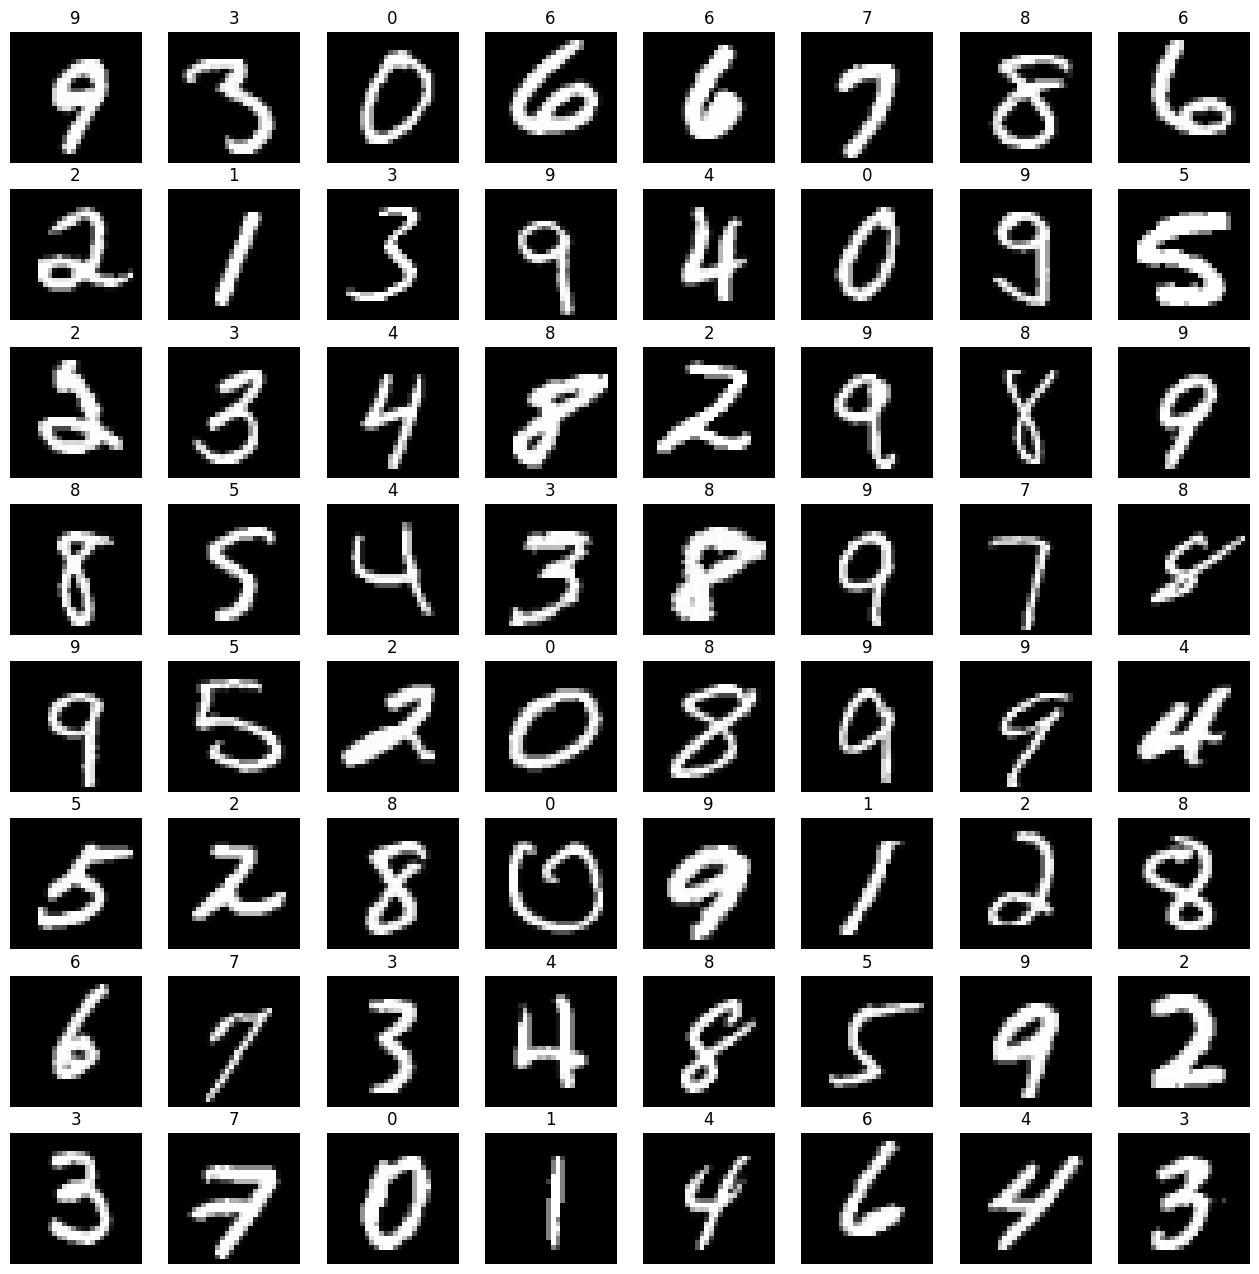

In [ ]:
loader = DataLoader(
    dataset=train_data,
    batch_size=64,
    shuffle=True
)

imgs, labels = next(iter(loader))

fig, axes = plt.subplots(8, 8, figsize=(16, 16))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((28, 28)), cmap='gray')
    ax.set_title(label.item())
    ax.axis('off')

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3, padding='same'),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(32, 64, kernel_size=3, padding='same'),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Flatten(),
    nn.Linear(7 * 7 * 64, 10)
).to(device)

print(model)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=3136, out_features=10, bias=True)
)


In [ ]:
# 학습
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10

for epoch in range(epochs):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        y_pred = model(x_batch)

        loss = nn.CrossEntropyLoss()(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 배치 단위 loss 저장
        sum_losses = sum_losses + loss.item()
        # 배치 단위 정확도 저장
        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100

        sum_accs = sum_accs + acc.item()
    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)

    print(f'Epoch {epoch+1:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    1/10 Loss: 0.173639 Accuracy: 94.86%
Epoch    2/10 Loss: 0.054002 Accuracy: 98.36%
Epoch    3/10 Loss: 0.041041 Accuracy: 98.72%
Epoch    4/10 Loss: 0.032275 Accuracy: 98.99%
Epoch    5/10 Loss: 0.026592 Accuracy: 99.17%
Epoch    6/10 Loss: 0.020186 Accuracy: 99.34%
Epoch    7/10 Loss: 0.018458 Accuracy: 99.38%
Epoch    8/10 Loss: 0.013914 Accuracy: 99.54%
Epoch    9/10 Loss: 0.011614 Accuracy: 99.61%
Epoch   10/10 Loss: 0.009475 Accuracy: 99.70%


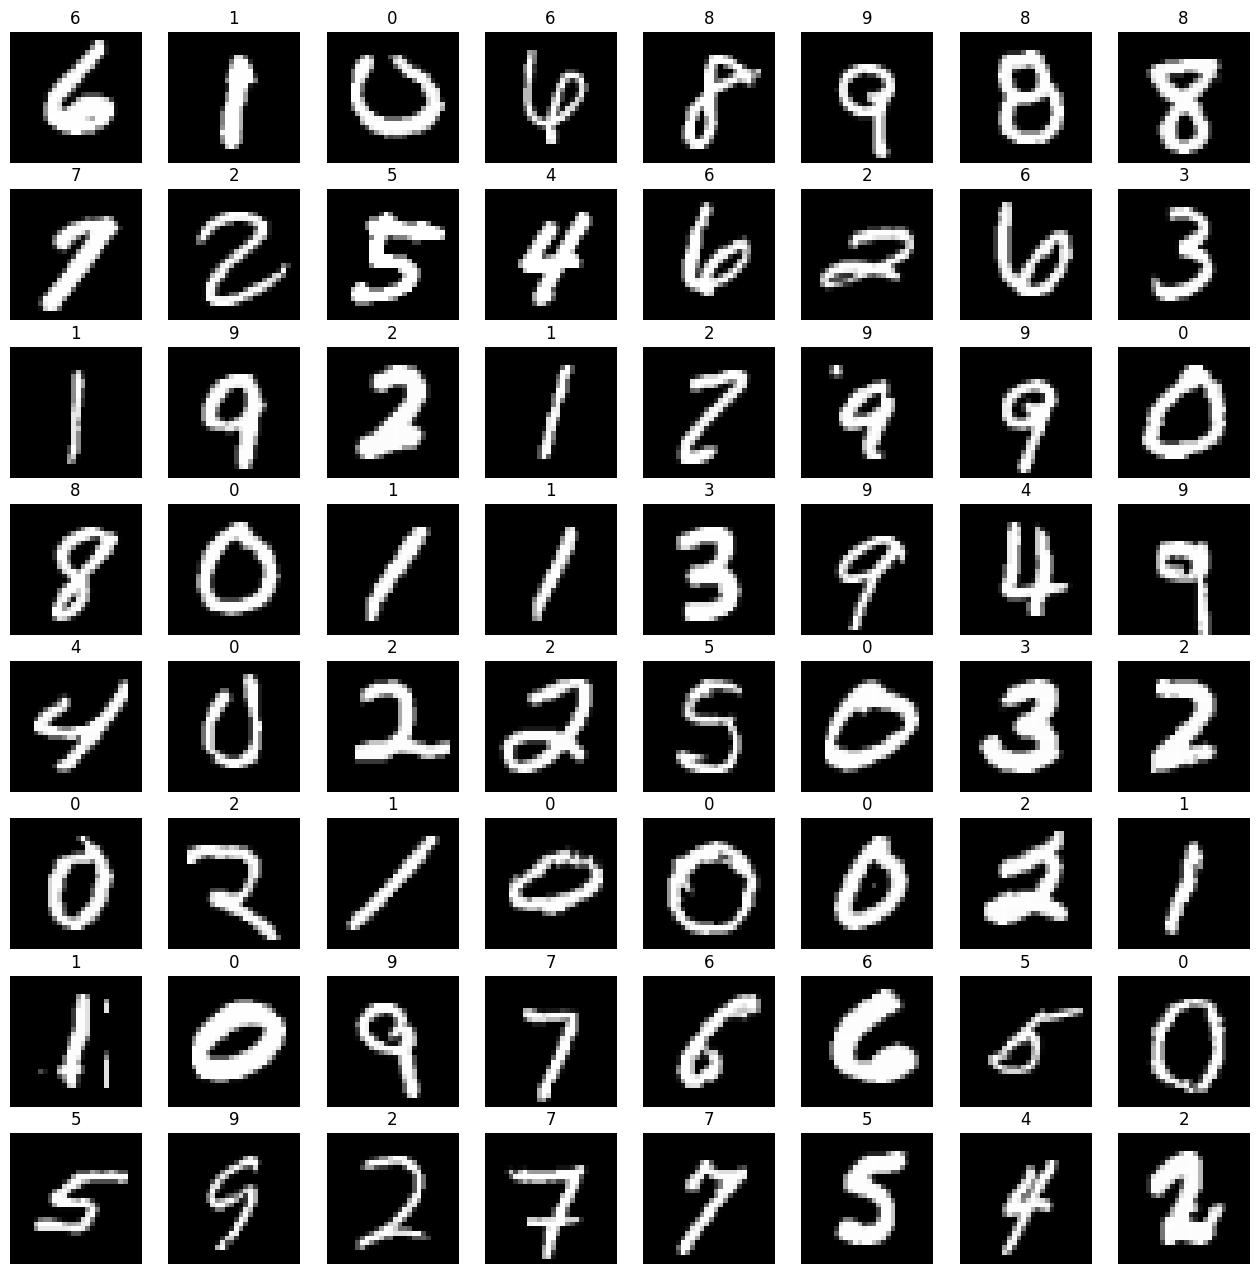

In [ ]:
test_loader = DataLoader(
    dataset=test_data,
    batch_size=64,
    shuffle=True
)

imgs, labels = next(iter(test_loader))

fig, axes = plt.subplots(8, 8, figsize=(16, 16))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((28, 28)), cmap='gray')
    ax.set_title(label.item())
    ax.axis('off')

In [ ]:
model.eval() # 모델을 테스트 모드로 전환

sum_accs = 0



for x_batch, y_batch in test_loader:
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)

    y_pred = model(x_batch)

    y_prob = nn.Softmax(1)(y_pred)
    y_pred_index = torch.argmax(y_prob, axis=1)
    acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100

    sum_accs = sum_accs + acc.item()

avg_acc = sum_accs / len(test_loader)

print(f'테스트 정확도는 {avg_acc:.2f}% 입니다')

테스트 정확도는 98.91% 입니다
